In [1]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Use basic Python operators to find the number of seconds in the month of June. Find the
number of seconds that have lapsed between 1 June at noon and 14 Aug, 9:30 AM.

In [4]:
sec_in_day = 60*60*24
sec_in_june = sec_in_day * 30
sec_in_period = sec_in_day * 73 + (60*60*21.5)
sec_in_june
sec_in_period

6384600.0

Import a table (‘world_population.csv’) and find:

a. The population in 2015 (the dataset begins at 1950).

b. The population growth between 1950 and 2015.

c. The average annual growth rate over the course of the dataset.

In [5]:
world_population = Table.read_table('world_population.csv')
pop_in_2016 = world_population.take(65)
pop_in_2016

Population
7256490011


In [6]:
population_1950 = world_population.take(0)
population_1950

Population
2557628654


In [8]:
pop_array = world_population.column(0)
change = pop_array[65] - pop_array[0]
growth = change ** (1/66) - 1
growth

0.401345886044538

The ‘Titanic’ dataset describes passengers on the Titanic when it sank. Url:
https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv.
Information about this dataset can be found at a kaggle site
(https://www.kaggle.com/c/titanic). Import this dataset and answer the following
questions:

a. Relabel the ‘Pclass’ column to ‘passenger_class’.

b. Create a new column ‘family_size’ that adds the number of siblings/spouses,
‘SibSp’, to the number of children, ‘Parch’.

c. Create a barplot of number of passengers, broken down by passenger class.
HINT: you will need to use the group method on the dataset; for more info, see
the datascience package help.

d. Sort the data by age and show the youngest 5 passengers.

e. Now sort by age from oldest to youngest and show the oldest 5 passengers.
What did you notice? Eliminate these “nan” values and try again.

f. Find the survival rate for passengers of the Titanic, broken down by passenger
class. (HINT: select the columns you care about and then apply the group
method, summarizing with the mean.)

g. Now that you have some familiarity with the dataset, create two of your own
questions and answer them.

In [2]:
#a
data = 'https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv'
titanic = Table.read_table(data)
titanic = titanic.relabeled('Pclass', 'passenger_class')


PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,nan,S
879,0,3,"Laleff, Mr. Kristo",male,nan,0,0,349217,7.8958,nan,S
869,0,3,"van Melkebeke, Mr. Philemon",male,nan,0,0,345777,9.5,nan,S
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,nan,8,2,CA. 2343,69.55,nan,S
860,0,3,"Razi, Mr. Raihed",male,nan,0,0,2629,7.2292,nan,C
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,nan,1,0,17453,89.1042,C92,C
847,0,3,"Sage, Mr. Douglas Bullen",male,nan,8,2,CA. 2343,69.55,nan,S
840,1,1,"Marechal, Mr. Pierre",male,nan,0,0,11774,29.7,C47,C
838,0,3,"Sirota, Mr. Maurice",male,nan,0,0,392092,8.05,nan,S
833,0,3,"Saad, Mr. Amin",male,nan,0,0,2671,7.2292,nan,C


In [4]:
#b
siblings = titanic.column(6)
children = titanic.column(7)
famsize = titanic.with_column('family_size',siblings+children)
famsize.show(10)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


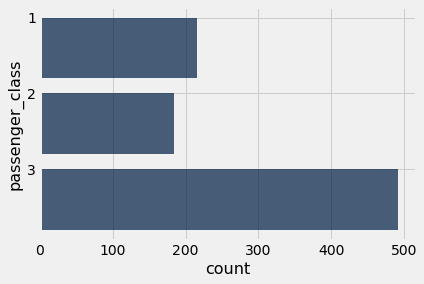

In [6]:
#c
pax = famsize.group('passenger_class')
pax.barh('passenger_class')

In [9]:
#d
youngest = famsize.sort('Age').show(5)
youngest
#e
oldest = famsize.where('Age',are.between(0,200)).sort('Age', descending = True).show(5)
oldest

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C,1
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S,2
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C,3
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C,3
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S,2


PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,0
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S,0
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C,0
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,0
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q,0


In [10]:
#f
survived = famsize.select('Survived', 'passenger_class')
survived.group('passenger_class',np.mean)

passenger_class,Survived mean
1,0.62963
2,0.472826
3,0.242363


In [11]:
#g
#1) Which family size had the highest survival rate?
fam_survival = famsize.select('Survived','family_size')
fam_survival.group('family_size', np.mean)

family_size,Survived mean
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.2
5,0.136364
6,0.333333
7,0
10,0


In [13]:
#2) Which gender had a higher survival rate?
gender = famsize.select('Survived', 'Sex')
gender.group('Sex', np.mean)

Sex,Survived mean
female,0.742038
male,0.188908
